In [11]:
import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import pingouin as pg
from math import sqrt
from statistics import mean
from scipy.stats import norm
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Using simulation to investigate Type II error rate

<Axes: xlabel='Group', ylabel='Scores'>

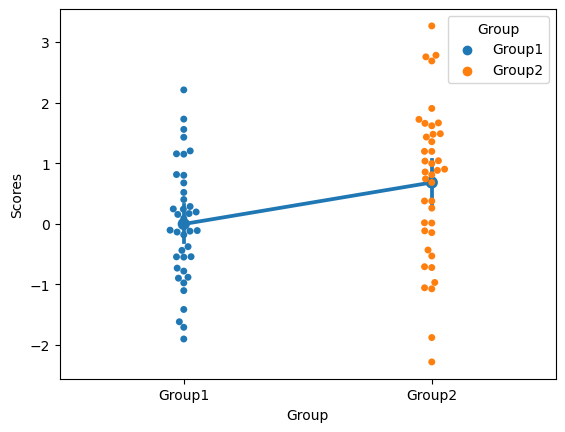

In [3]:

mean1 = 0
n = 40
effect_size = 0.7
sd = 1

#n1 = 10000
#n2 = 10000

group1 = np.random.normal(loc = mean1, scale = sd, size = n)
group2 = np.random.normal(loc = mean1 + effect_size, scale = sd, size = n)

df = pd.DataFrame({'Group1': group1, 'Group2': group2}).melt(var_name = 'Group', value_name = 'Scores')

sns.pointplot(data = df, x = 'Group', y = 'Scores')
sns.swarmplot(data = df, x = 'Group', y = 'Scores', hue = 'Group')


In [4]:
pg.ttest(group1, group2, correction=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.737124,78,two-sided,0.007673,"[-1.18, -0.19]",0.61204,5.549,0.771357


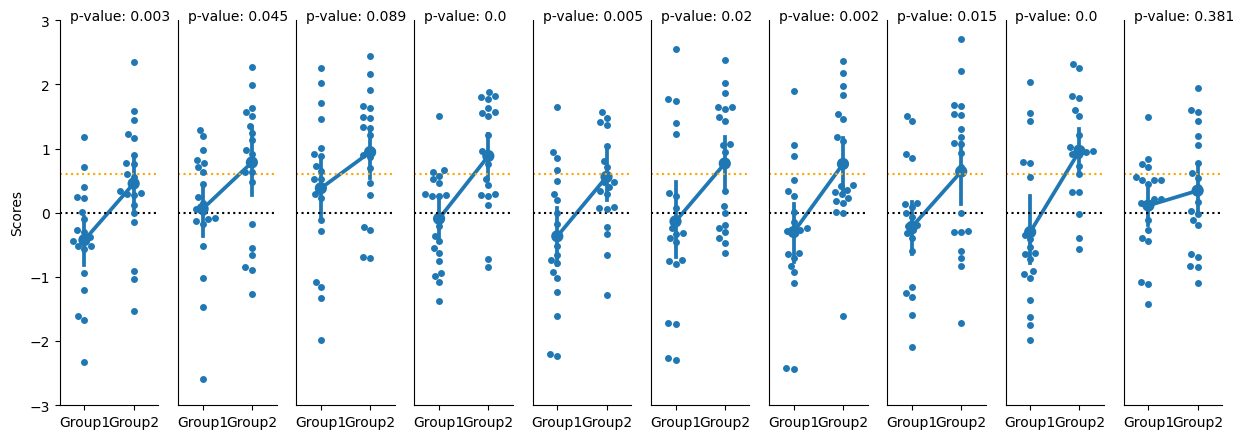

In [7]:
mean1 = 0
n = 20
effect_size = 0.6
sd = 1

#n1 = 10000
#n2 = 10000


experiments = 10

fig, axes = plt.subplots(1, experiments, figsize=(15, 5))





for i in range(experiments):
   group1 = np.random.normal(loc = mean1, scale = sd, size = n)
   group2 = np.random.normal(loc = mean1 + effect_size, scale = sd, size = n)
   df = pd.DataFrame({'Group1': group1, 'Group2': group2}).melt(var_name = 'Group', value_name = 'Scores')
   sns.pointplot(data = df, x = 'Group', y = 'Scores', ax = axes[i])
   sns.swarmplot(data = df, x = 'Group', y = 'Scores', ax = axes[i])
   axes[i].set(xlabel=None)
   axes[i].set_ylim(-3, 3)
   axes[i].axhline(y = mean1, color = 'black', linestyle = 'dotted')
   axes[i].axhline(y = effect_size, color = 'orange', linestyle = 'dotted')
   sns.despine()
   if i > 0:
    axes[i].get_yaxis().set_visible(False)
   res = pg.ttest(group1,group2)
   p = res['p-val'][0]
   axes[i].text(0.1, 1, 'p-value: ' + str(round(p,3)), transform=axes[i].transAxes)

   

- Sex differences in personality: effect sizes around .2 to .3  
- Effects of educational interventions: effect sizes around .3 to .4  
- Sex differences in height: effect size around 1.7  

(from Dorothy Bishop's [video on effect sizes](https://youtu.be/ovHzFVzJyQg?si=MY4-6MF6Ln2lxyNL&t=247))

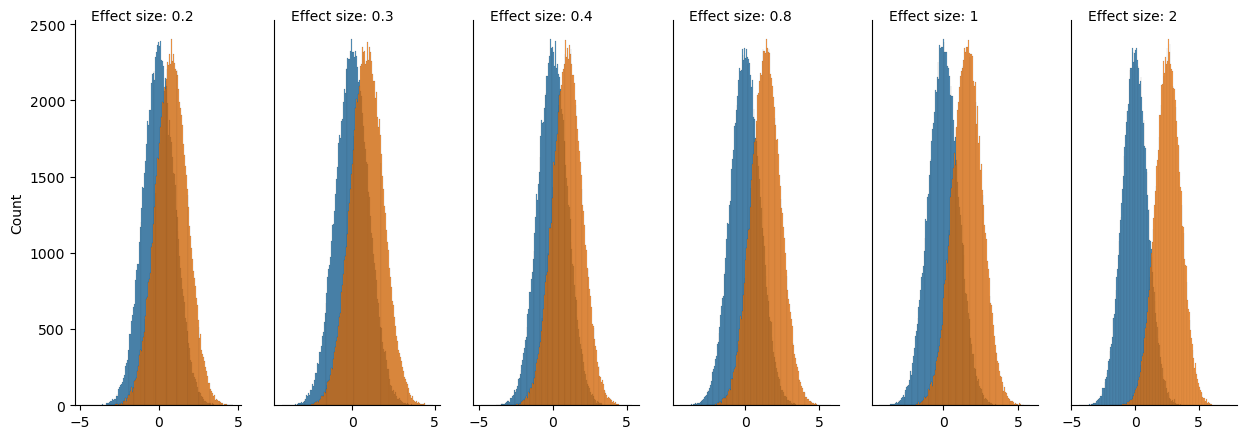

In [8]:
n = 100000
mean1 = 0
sd = 1

effect_sizes = [0.2, 0.3, 0.4, 0.8, 1, 2]

fig, axes = plt.subplots(1, len(effect_sizes), figsize=(15, 5))

for i in range(len(effect_sizes)):
   group1 = np.random.normal(loc = mean1, scale = sd, size = n)
   group2 = np.random.normal(loc = effect_sizes[i] + effect_size, scale = sd, size = n)
   sns.histplot(group1, ax = axes[i])
   sns.histplot(group2, ax = axes[i])
   sns.despine()
   axes[i].text(0.1, 1, 'Effect size: ' + str(effect_sizes[i]), transform=axes[i].transAxes)
   if i > 0:
      axes[i].get_yaxis().set_visible(False)
   


## Using simulation and published research to inform our own research

<img src="https://github.com/ethanweed/ExPsyLing/blob/master/Slides/Images/Peel%20et%20al_2022_Figure-3.png?raw=true" width="600"/>

<img src="https://github.com/ethanweed/ExPsyLing/blob/master/Slides/Images/Peel%20et%20al%20_2022_Table-1.png?raw=true" width="600"/>

"Twenty right-handed, native English speakers (M age = 24.10 years, 7 males) participated in the experiment." 

In [12]:
# Estimate the effect size distribution from Peel et al (2022) comparison between short SOA congruent and incongruent
 
# function to convert standard error to standard deviation
def SE_to_SD (se,n):
    sd = se * sqrt(n)
    return(sd)

# function to sample from a normal distribution
# not really necessary, now that I think about it, but maybe it makes the code a little clearer below
def take_sample (mean, sd, n):
    nums = np.random.normal(loc = mean, scale = sd, size = n)
    return(nums)

# set the number of participants (from the paper)
n = 20

# enter the data from Table 1

# means
mean_Short_Inc = 836
mean_Short_Cong = 805
mean_Long_Inc = 800
mean_Long_Cong = 801


# standard errors (convert to standard deviation)
sd_Short_Inc = SE_to_SD(27.7, n)
sd_Short_Cong = SE_to_SD(28.6, n)
sd_Long_Inc = SE_to_SD(27.6, n)
sd_Long_Cong = SE_to_SD(28.6, n)

# sample from a normal distribution for each combination of mean, standard deviation, and number of participants
dist_Short_Inc = take_sample(mean_Short_Inc, sd_Short_Inc, n)
dist_Short_Cong = take_sample(mean_Short_Cong, sd_Short_Cong, n)
dist_Long_Inc = take_sample(mean_Long_Inc, sd_Long_Inc, n)
dist_Long_Cong = take_sample(mean_Long_Cong, sd_Long_Cong, n)

# put the results in a dataframe
data = pd.DataFrame({'short_inc': dist_Short_Inc,
                    'short_cong': dist_Short_Cong,
                    'long_inc': dist_Long_Inc,
                    'long_cong': dist_Long_Cong})


data


,short_inc,short_cong,long_inc,long_cong
0,805.529337,801.710356,864.421532,643.265396
1,918.146376,759.523835,1023.054772,623.558406
2,732.836168,829.372881,854.622134,1024.855229
3,889.112989,789.297814,798.078679,1071.031397
4,908.930012,478.427438,891.766714,810.135410
5,883.011868,610.739991,749.860130,749.500689
6,1057.597168,825.071785,807.428811,856.968338
7,658.912473,691.497096,706.621644,824.351277
8,974.330301,519.385791,900.715283,589.656702
9,1110.289886,837.887574,868.484111,868.975138


In [13]:
# Use pingouin to compute the effect size for the short soa congruent / incongruent comparison
pg.compute_effsize(data.short_inc, data.short_cong, paired=True, eftype='cohen')


0.8590109437424768

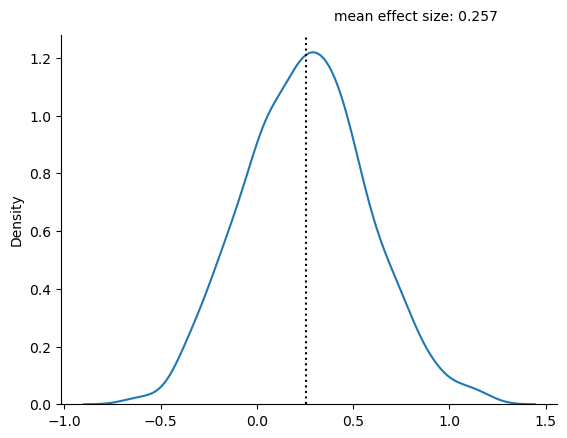

In [14]:
# put the code from above in a loop, to estimate the distribution of effect sizes based on Peet et al.

n = 20

effect_sizes = []
runs = 1000


for i in range(runs):
    mean_Short_Inc = 836
    mean_Short_Cong = 805
    mean_Long_Inc = 800
    mean_Long_Cong = 801
    
    sd_Short_Inc = SE_to_SD(27.7, n)
    sd_Short_Cong = SE_to_SD(28.6, n)
    sd_Long_Inc = SE_to_SD(27.6, n)
    sd_Long_Cong = SE_to_SD(28.6, n)
    dist_Short_Inc = take_sample(mean_Short_Inc, sd_Short_Inc, n)
    dist_Short_Cong = take_sample(mean_Short_Cong, sd_Short_Cong, n)
    dist_Long_Inc = take_sample(mean_Long_Inc, sd_Long_Inc, n)
    dist_Long_Cong = take_sample(mean_Long_Cong, sd_Long_Cong, n)

    data = pd.DataFrame({'short_inc': dist_Short_Inc,
                        'short_cong': dist_Short_Cong,
                        'long_inc': dist_Long_Inc,
                        'long_cong': dist_Long_Cong})
    effect_sizes.append(pg.compute_effsize(data.short_inc, data.short_cong, paired=True, eftype='cohen').round(3))

ax = sns.kdeplot(effect_sizes)
mean_effect_size = round(np.array(effect_sizes).mean(), 3)
ax.axvline(x = mean_effect_size, color = 'black', linestyle = 'dotted')
ax.text(0.4, 1.33, 'mean effect size: ' + str(mean_effect_size))
sns.despine()



In [31]:



df = pd.read_csv('https://raw.githubusercontent.com/ethanweed/ExPsyLing/refs/heads/master/Experiments/Experiment%201/data/data_ExPsyLing_2024.csv')

df = df[df['sender'] == 'target']                           # make a dataframe with only the data from the "target" rows
df = df[df['condition'] != 'practice']                      # make a dataframe that only includes the "real" data (not the data from the practice round)

df['response_action'] = df['response_action'].replace('keypress(n)', 'n') 
df['response_action'] = df['response_action'].replace('keypress(m)', 'm')
df['correct'] = df['response_action'] == df['correct_response']
df = df[df['correct'] == True]
df = df[df['duration']< 1400]
df.head()

,url,sender,sender_type,sender_id,ended_on,duration,time_run,time_render,time_show,time_end,...,response,response_action,prime,target,condition,soa_condition,congruence,correct_response,correctResponse,correct
41,4482,target,canvas.Screen,12_0_0_0_5,response,1097.0,94022.0,94021.0,94037.0,95118.0,...,response_manmade,m,storm,LAND,Inc_Nat_Nat,long,incongruent,m,m,True
48,4482,target,canvas.Screen,12_0_0_1_5,response,905.0,95805.0,95804.0,95821.0,96709.0,...,response_manmade,m,jeans,JEANS,Con_Synth,long,congruent,m,m,True
55,4482,target,canvas.Screen,12_0_0_2_5,response,954.0,97405.0,97404.0,97427.0,98358.0,...,response_natural,n,stone,STONE,Con_Nat,long,congruent,n,n,True
62,4482,target,canvas.Screen,12_0_0_3_5,response,1051.0,99055.0,99054.0,99071.0,100105.0,...,response_manmade,m,taxi,CHAIN,Inc_Synth_Synth,long,incongruent,m,m,True
69,4482,target,canvas.Screen,12_0_0_4_5,response,679.0,100789.0,100788.0,100804.0,101467.0,...,response_natural,n,crab,CRAB,Con_Nat,long,congruent,n,n,True


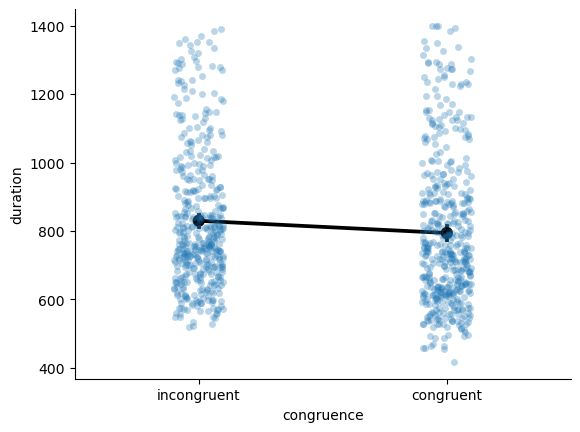

In [35]:
#ax = sns.boxplot(data = df[df['soa_condition'] == 'short'], x = 'congruence', y = 'duration')  # make the plot

ax = sns.stripplot(data = df[df['soa_condition'] == 'short'], x = 'congruence', y = 'duration', alpha = 0.3)  # make the plot
ax = sns.pointplot(data = df[df['soa_condition'] == 'short'], x = 'congruence', y = 'duration', color='black')  # make the plot
sns.despine()                 

In [36]:
cong = df[(df['soa_condition'] == 'short') & (df['congruence'] == 'congruent')]['duration']
incong = df[(df['soa_condition'] == 'short') & (df['congruence'] == 'incongruent')]['duration']

pg.ttest(cong, incong, paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.537119,886.834752,two-sided,0.011347,"[-63.25, -8.08]",0.169698,1.763,0.714037


## Meta-analysis

Estimating effect sizes from the literature

<img src="https://github.com/ethanweed/ExPsyLing/blob/master/Slides/Images/Weed%20et%20al_2020_%20RHD%20met-analysis.png?raw=true" width=""/>